In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
import sys
sys.path.append('../common')
from commonfunctions import visualize_cluster_data_meanshift, find_new_clusters

In [3]:
# Read the dataset
dataset = pd.read_csv('../Data/data2.csv')
dataset.head(10)

,#,x,y
0,1,5,5
1,2,4,4
2,3,5,3
3,4,6,4
4,5,9,4
5,6,8,6
6,7,10,7
7,8,9,8
8,9,10,5
9,10,9,6


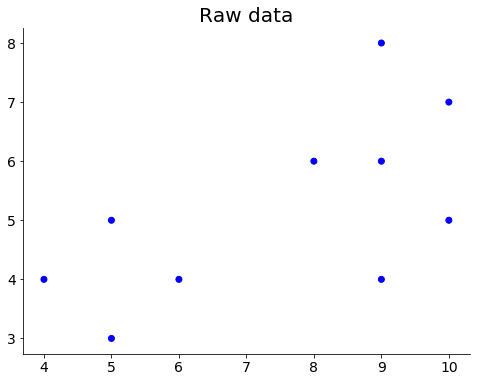

In [4]:
# Select dataset if required
X = dataset.iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data_meanshift(plt, X, clusters, title = 'Raw data', showCircle=False, filename='msexample0')

## Algorithm
Start with individual data point as its own cluster and run the next set of steps till the algorithm converges. For the purpose of this example, we will run the loop 10 times without checking the convergence condition.

In [5]:
clusters = X
counter = 1 
r = 1.45

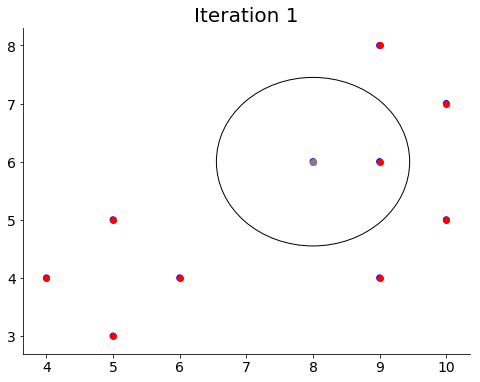

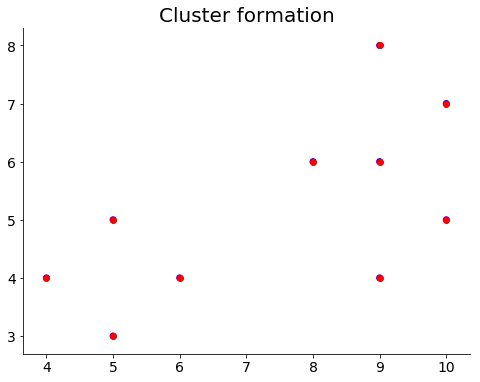

In [6]:
# Visualize iteration 1
visualize_cluster_data_meanshift(plt, X, [2] * X.shape[0], 'Iteration '+ (str)(counter), centroids = clusters, showCircle=True, r = r, c_index = 5, filename='msexample' + (str)(counter))
visualize_cluster_data_meanshift(plt, X, [2] * X.shape[0], 'Cluster formation', centroids = clusters, filename='msexamplecluster' + (str)(counter))

Based on the radius find the new position of the centroid by finding the mean of all the centroids within radius distance

Repeat this procedure till centroids stop moving

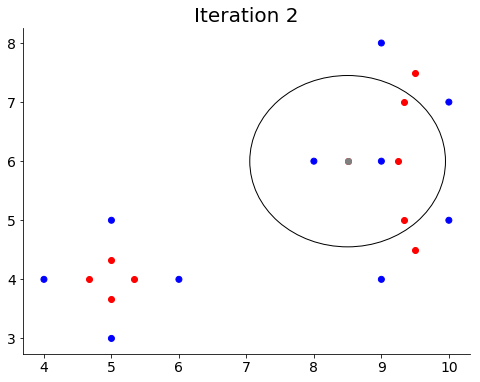

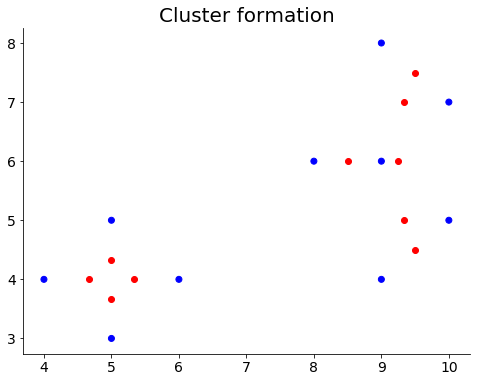

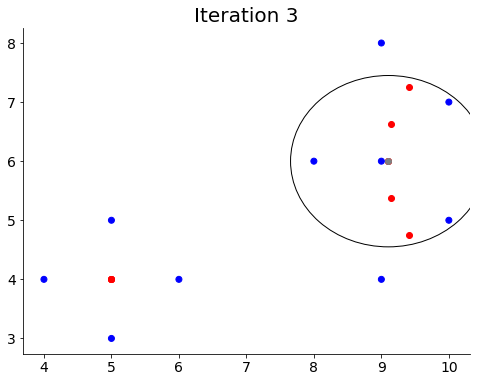

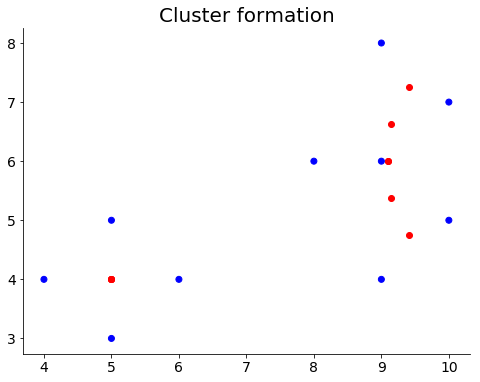

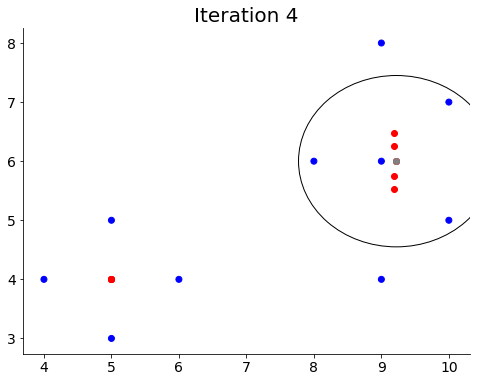

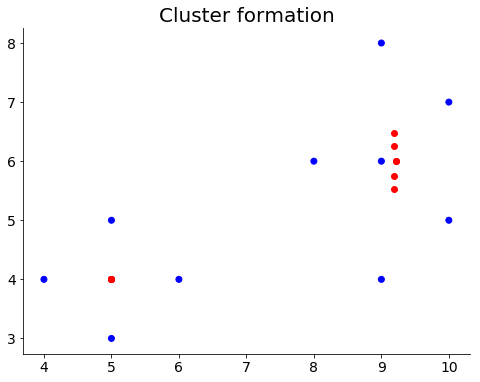

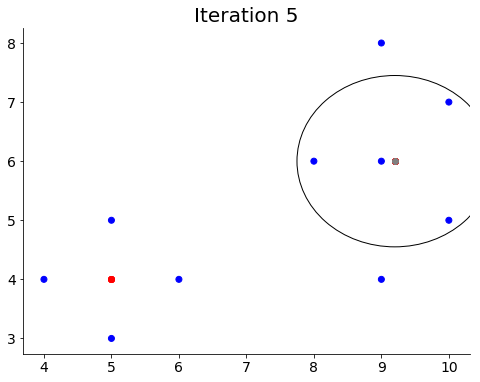

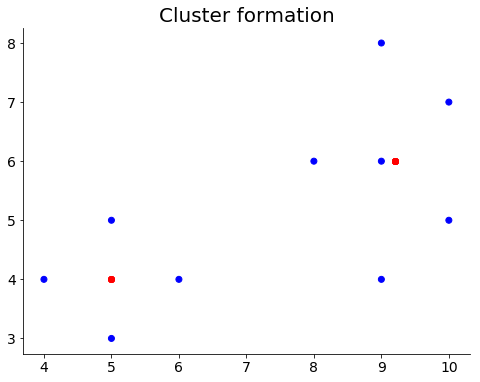

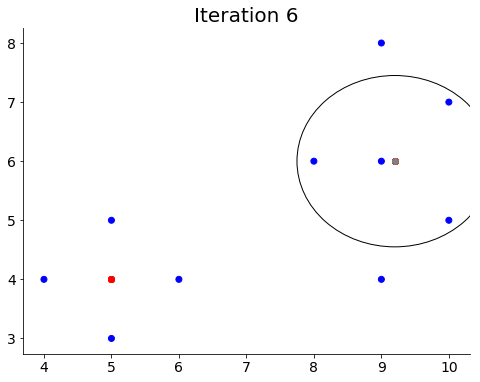

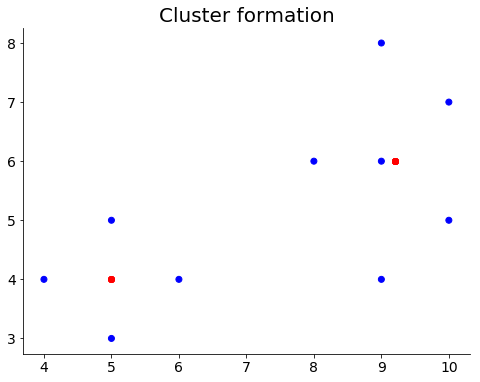

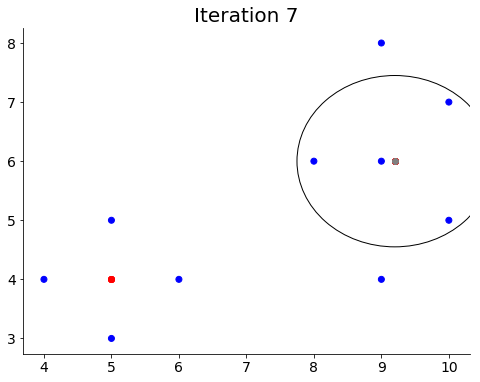

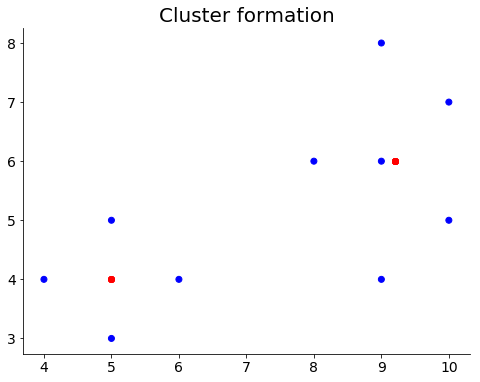

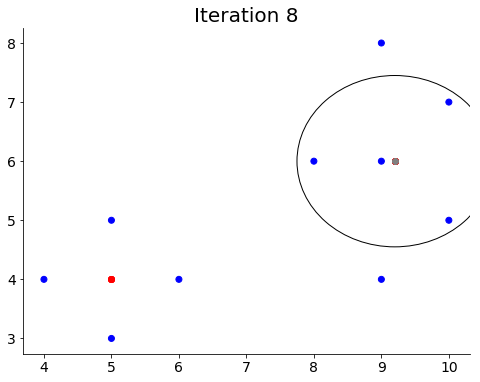

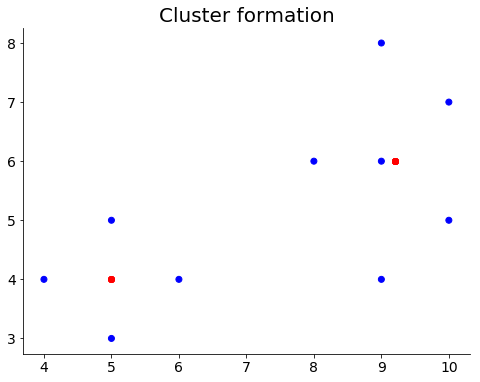

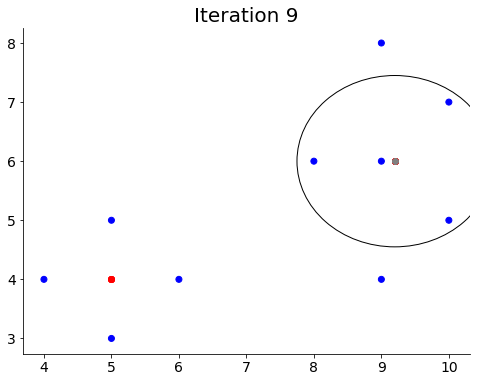

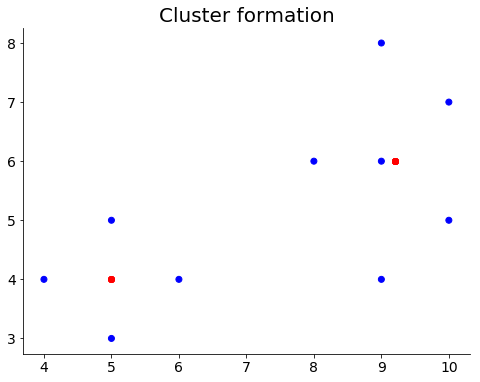

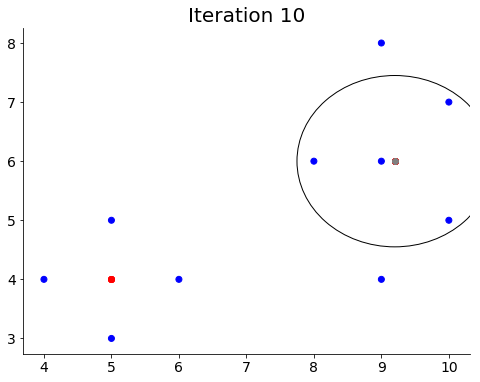

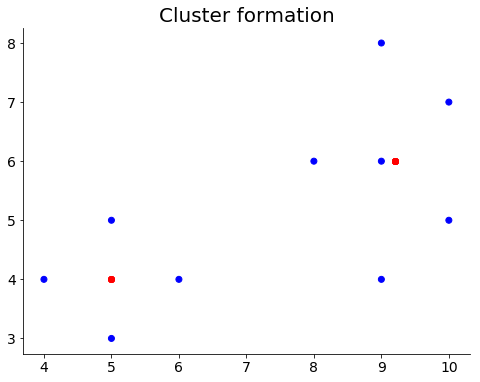

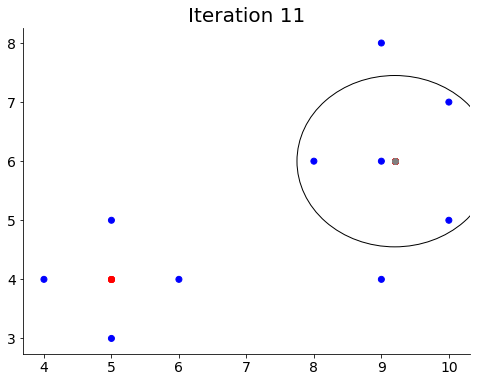

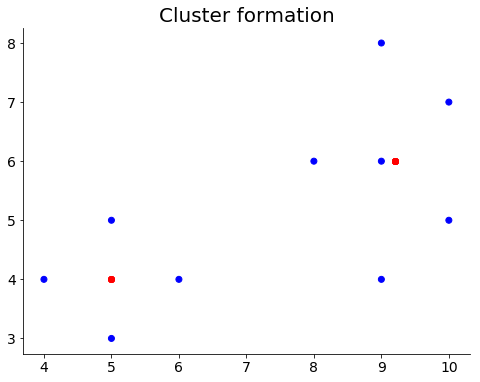

In [7]:
while True:
    # identify new clusters
    clusters = find_new_clusters(clusters, r)
    
    # Increment the loop counter
    counter = counter + 1    
    
    # Visualize current iteration
    visualize_cluster_data_meanshift(plt, X, [2] * X.shape[0], 'Iteration '+ (str)(counter), centroids = clusters, showCircle=True, r = r, c_index = 5, filename='msexample' + (str)(counter))
    visualize_cluster_data_meanshift(plt, X, [2] * X.shape[0], 'Cluster formation', centroids = clusters, filename='msexamplecluster' + (str)(counter))
    
    # End of loop
    if (counter > 10):        
        break

Identify the unique centroids from the given cluster list

In [8]:
centroids = np.unique(clusters, axis = 0)
print(centroids)

[[ 5.         4.       ]
 [ 9.1994213  6.       ]]


Allocate the data points to final centroids

In [9]:
# By default, everything belongs to cluster -1
out = np.array(clusters)
final_clusters = [-1] * out.shape[0]

index = 0
for x,y in out:
    
    # Find the matching centroid    
    for i in range(0, centroids.shape[0]):
        if (x == centroids[i,0] and y == centroids[i,1]):
            final_clusters[index] = i
    
    index = index + 1

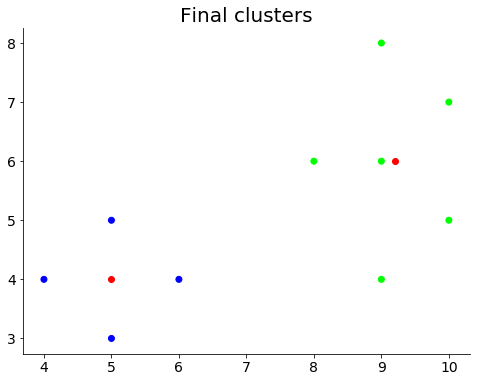

In [10]:
# Based on final cluster allocation, visualize the data
visualize_cluster_data_meanshift(plt, X, final_clusters, 'Final clusters', centroids = centroids, filename='msexampleclusterfinal')